In [2]:
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
from sklearn import datasets

In [20]:
# Based on: http://stackoverflow.com/a/38105540/3104151

# save load_iris() sklearn dataset to iris
iris = datasets.load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
irisDF = pd.DataFrame(
    data    = np.c_[ iris['data'], iris['target'] ],
    columns = iris['feature_names'] + ['target']
)

# Rename columns for clarity and ease of use
newNames = [ 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species' ]
irisDF.rename( 
    columns = { oldName : newName for oldName, newName in zip( irisDF.columns, newNames ) },
    inplace = True 
)

# Replace species indices with species names
Species = [ 'Iris setosa', 'Iris versicolour', 'Iris virginica' ]
irisDF.Species = [ Species[int(i)] for i in irisDF.Species ]

In [65]:
meanSpealLengthPerSpecies = irisDF.groupby('Species').agg({ 'SepalLength' : 'mean' })
meanSpealLengthPerSpecies

,SepalLength
Species,
Iris setosa,5.006
Iris versicolour,5.936
Iris virginica,6.588


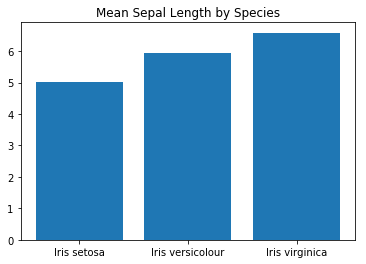

In [68]:
x  = meanSpealLengthPerSpecies.index
y  = meanSpealLengthPerSpecies.SepalLength
xi = list( range( len( x ) ) )
plt.bar( xi, y )
plt.xticks( xi, x )
plt.title( "Mean Sepal Length by Species" )
plt.show()

In [93]:
ax.bar( xi, y )
[ t.get_position()[1] for t in ax.yaxis.get_ticklabels() ]

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 0]

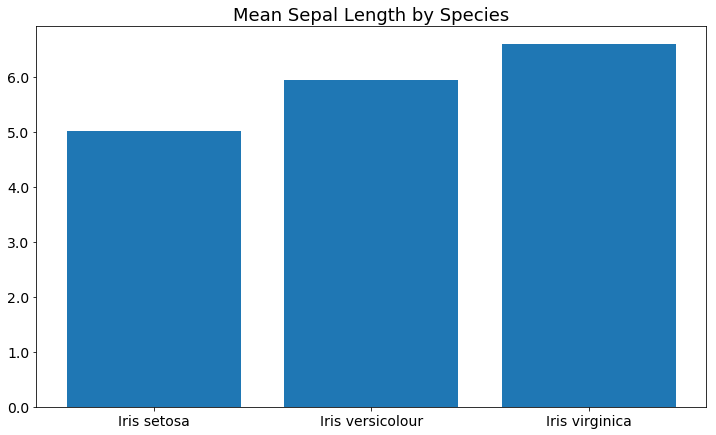

In [102]:
fig, ax = plt.subplots( figsize = ( 12, 7) )
ax.bar( xi, y )
ax.set_xticks( xi )
ax.set_xticklabels( x, fontsize = 14 )
ax.set_title( "Mean Sepal Length by Species", fontsize = 18 )
ax.set_yticklabels( np.linspace(0,7,8), fontsize = 14 )
plt.show()

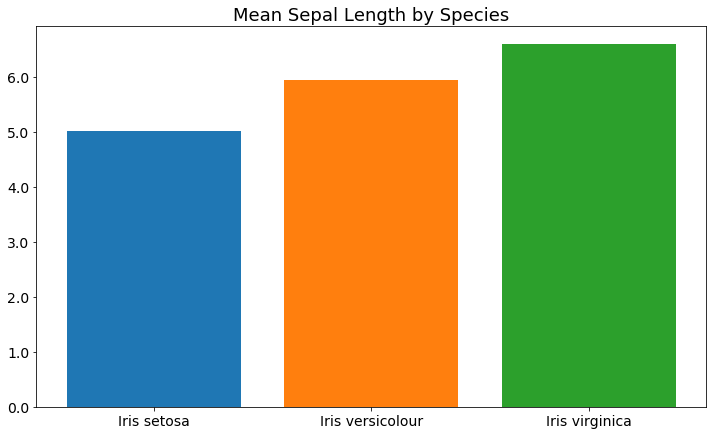

In [108]:
fig, ax = plt.subplots( figsize = ( 12, 7) )
ax.bar( xi, y, color = plt.get_cmap('Vega10').colors )
ax.set_xticks( xi )
ax.set_xticklabels( x, fontsize = 14 )
ax.set_title( "Mean Sepal Length by Species", fontsize = 18 )
ax.set_yticklabels( np.linspace(0,7,8), fontsize = 14 )
plt.show()

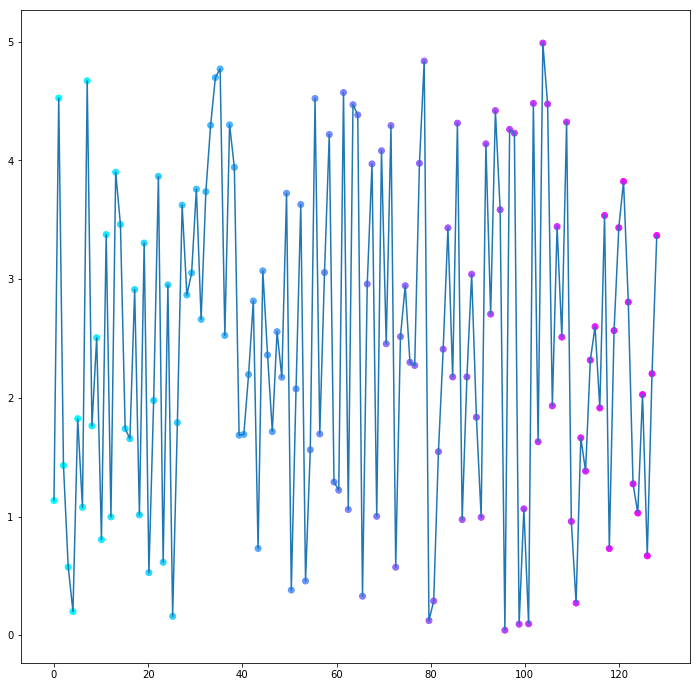

In [123]:
f, ax = plt.subplots( figsize = (12, 12 ) )
x = np.linspace(0,128,128)
y = np.random.random(128) * 5
ax.plot( x, y )
ax.scatter( x, y, color = [ plt.cm.cool(i*2) for i in range(128) ] )
plt.show()


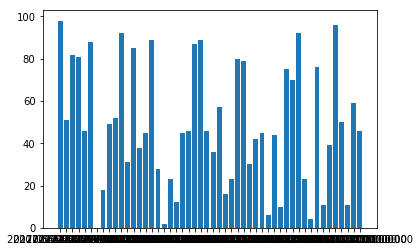

In [60]:
# Timeseries data
from datetime import datetime, timedelta
firstDay = datetime( 2017, 5, 17 )
x = pd.Series([ firstDay + timedelta(i) for i in range(50) ])
y = np.random.randint(0, 100, 50)

# Timeseries data makes for pretty long and cumbersome x axis labels.
# Will not work with default settings.
xi = list( range( len( x ) ) )
plt.bar( xi, y )
plt.xticks( xi, x )
plt.show()

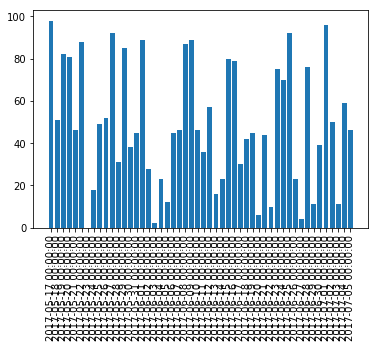

In [63]:
plt.bar( xi, y )
plt.xticks( xi, x, rotation = 90 )
plt.show()

In [34]:
# Nutrition, Physical Activity, and Obesity - Behavioral Risk Factor Surveillance System;
# Metadata Updated: April 17, 2017 
medDF = pd.read_csv( 'https://chronicdata.cdc.gov/api/views/hn4x-zwk7/rows.csv?accessType=DOWNLOAD' )

In [38]:
mtcars = pd.read_csv("mtcars.csv")

In [39]:
mtcars.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [40]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [43]:
valueCounts = mtcars.cyl.value_counts().sort_index()

In [4]:
boston = datasets.load_boston()
bostonDF = pd.DataFrame(
    data    = np.c_[ boston['data'], boston['target'] ],
    columns = list( boston['feature_names'] ) + ['MEDV']
)